# Convex Hull - Incremental Algorithm
## By Gabriel Bastianello Lima

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Generating random points

From this cell you can generate random points at each time you run the notebook and see how the convex hull behaves for different sets of points.

In [2]:
from random import randrange

def generator(n):
    
    ''' receives the number 'n' of points and creates
    n random points in the 2-dimensional space'''
    
    points = []
    for i in range(n):
        p = (randrange(0, 50), randrange(0, 50))
        points.append(p)
    return points

points = generator(randrange(0, 100))

file = open('file.txt', 'w')

file.write(f'{len(points)} \n')

for point in points:
    file.write(f'{point[0]},{point[1]} \n')

file.close()

## Reading the .txt

In [3]:
file = open('file.txt', 'r+')

## Converting the txt file into useful data:

In [4]:
formated_file = file.read().split(' \n')

In [5]:
def converts_file_to_coordinates(text):

    '''
    function that converts the text to an array of coordinates.
    '''

    number_of_points = int(text[0])

    points = []
    for line in text[1:]:

        if line != '':
            separated_string = line.split(',')
            point = (float(separated_string[0]), float(separated_string[1]))
            points.append(point)

    return points

coordinates = np.unique(converts_file_to_coordinates(formated_file), axis=0)
# there's no need to sort the points. the np.unique command already does it.

In [6]:
file.close()

In [7]:
coordinates # let's see what the points look like

array([[ 5., 49.],
       [11.,  6.],
       [14., 30.],
       [14., 36.],
       [20., 45.],
       [26., 32.],
       [28., 48.],
       [31., 21.],
       [37., 16.],
       [43., 47.],
       [44., 16.],
       [45., 26.]])

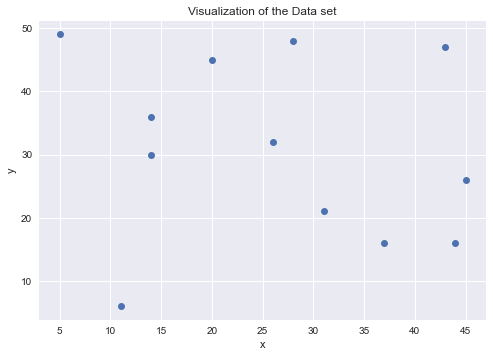

In [8]:
plt.style.use('seaborn')

xs = np.array([c[0] for c in coordinates])
ys = np.array([c[1] for c in coordinates])

plt.title('Visualization of the Data set')
plt.plot(xs, ys, 'o')
plt.xlabel('x')
plt.ylabel('y');

## Calculating the convex hull

In [9]:
def subroutine(hull, point):

    bool0  = True
    bool1 = False

    for i in range(len(hull)):
        v0 = hull[i] - hull[(i+1) % len(hull)] 
        v1 = point - hull[(i+1) % len(hull)] 

        if np.linalg.det([v1, v0]) <= 0: 

            if bool0:
                first = i
                bool0 = False

            else:
                last = i
                bool1 = True   
    if bool1:
        new_hull = np.append(hull[ : first + 1],hull[last + 1: ], axis = 0)
        new_hull = np.insert(new_hull, first + 1, [point], axis = 0)

    else:
        new_hull = np.insert(hull, first+1, [point], axis = 0)

    return new_hull

def convex_hull(points):
    
    hull_0 = points[:3]
    if np.linalg.det([hull_0[2] - hull_0[1], hull_0[0] - hull_0[1]]) < 0:
        hull_0 = np.array([points[0], points[2], points[1]])
    hull = hull_0

    for point in points[3:]: 
        hull_0 = hull
        hull = subroutine(hull_0, point)

    return hull

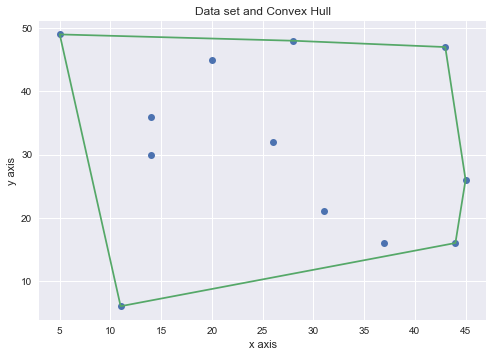

In [10]:
H = convex_hull(coordinates)

cx = [c[0] for c in coordinates]
cy = [c[1] for c in coordinates]

xs = np.hstack(([h[0] for h in H], [H[0][0]]))
ys = np.hstack(([h[1] for h in H], [H[0][1]]))

plt.plot(cx, cy, 'o')
plt.plot(xs, ys)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Data set and Convex Hull');